In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [2]:
class Loanstate(TypedDict):

    name:str
    age :int
    credit_score:int
    income :int

    age_ok:bool
    credit_ok:bool
    status:str
    decision:str

In [3]:
def check_age(state:Loanstate)->Loanstate:

    if 21<= state['age'] <= 60:
        age_ok = True
        status ="Age Ok"
    else:
        age_ok = False
        status ="Rejected _Age must be 21 -60"

    return {"age_ok":age_ok,"status":status}

In [8]:
def check_credit(state:Loanstate)->Loanstate:

    if state['credit_score'] >= 650:
        credit_ok = True
        status = "credit Ok"
    else:
        credit_ok = False
        status = "Rejected -Credit Score must be above 650"

    return {"credit_ok":credit_ok,"status":status}

In [5]:
def approve(state:Loanstate)->Loanstate:

    decision = "Approved"
    status =f"Loan approved for {state['name']}"

    return {"decision":decision,"status":status}

In [6]:
def reject(state:Loanstate)->Loanstate:

    decision = "Rejected"
    status =f"Loan rejected for {state['name']}"

    return {"decision":decision,"status":status}

In [7]:
# using the condiotonal routing

def route_after_age(state:Loanstate)->Loanstate:

    if state.get("age_ok"):  # if age is valid return the check credit_node
        return "check_credit"
    else:
        return "reject"
    




In [9]:

def route_after_credit(state:Loanstate)->Loanstate:

    if state.get("credit_ok"):  # if age is valid return the check credit_node
        return "approve"
    else:
        return "reject"

In [10]:
graph = StateGraph(Loanstate)

#add node
graph.add_node("check_age",check_age)
graph.add_node("check_credit",check_credit)
graph.add_node("approve",approve)
graph.add_node("reject",reject)


#defining the edges
graph.add_edge(START,"check_age")


#condiional _edges

graph.add_conditional_edges("check_age",route_after_age,
                            {'check_credit':"check_credit","reject":"reject"})

graph.add_conditional_edges("check_credit",route_after_credit,
                            {'approve':"approve","reject":"reject"})

graph.add_edge("approve",END)
graph.add_edge("reject",END)


workflow = graph.compile()


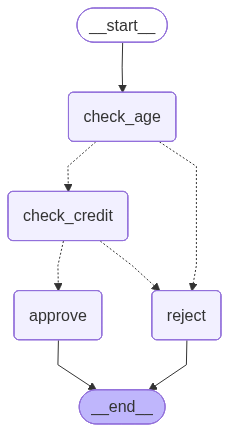

In [11]:
workflow

In [13]:
app1 = {
    "name": "John Doe",
    "age": 35,
    "credit_score": 720,
    "income": 75000
}


app1_status = workflow.invoke(app1)
print(app1_status)

{'name': 'John Doe', 'age': 35, 'credit_score': 720, 'income': 75000, 'age_ok': True, 'credit_ok': True, 'status': 'Loan approved for John Doe', 'decision': 'Approved'}
